## 파일 읽기 & 리사이징

In [12]:
import tensorflow as tf
import numpy as np
import zipfile
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# 이미지를 읽어와 크기를 변경하는 함수
def resize_images(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # zip 파일 안의 모든 파일에 대해 순회하며 이미지를 읽어와 크기를 변경하여 numpy 배열로 저장
        return np.array([np.array(Image.open(zip_ref.open(file)).convert("RGB").resize((28, 28))) for file in zip_ref.namelist()])

# 바위, 가위, 보 이미지 압축 파일 경로 지정
rock_path = "/aiffel/aiffel/rock.zip"
scissor_path = "/aiffel/aiffel/scissor.zip"
paper_path = "/aiffel/aiffel/paper.zip"

# 바위, 가위, 보 이미지 압축 파일에서 이미지를 읽어와 크기를 변경하여 numpy 배열로 저장
rock_images = resize_images(rock_path)
scissor_images = resize_images(scissor_path)
paper_images = resize_images(paper_path)



## CNN 생성함수

In [13]:
# CNN 모델 생성 함수
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5), # 과적합 방지를 위해 드롭아웃
        Dense(3, activation='softmax')
    ])
    # 모델 컴파일
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# CNN 모델 생성
model = create_model()
# 모델 구조 출력
model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

## 데이터 배열생성

In [14]:
# 가위, 바위, 보 이미지 배열을 합쳐서 X 배열 생성
X = np.concatenate((scissor_images, rock_images, paper_images), axis=0)
# 가위(0), 바위(1), 보(2) 라벨 배열을 합쳐서 y 배열 생성
y = np.concatenate((np.zeros(len(scissor_images)), np.ones(len(rock_images)), np.full(len(paper_images), 2)), axis=0)

## 데이터 정규화 및 분리

In [15]:
# 이미지 배열을 0~1 사이 값으로 정규화
X = X.astype('float32') / 255.0
# 학습용 데이터와 검증용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## 학습 및 평가

In [16]:
# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# 학습된 모델 평가
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

Epoch 1/10
8/8 [==============================] - 0s 22ms/step - loss: 1.1308 - accuracy: 0.4458 - val_loss: 1.0296 - val_accuracy: 0.3667
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 1.0022 - accuracy: 0.5417 - val_loss: 0.9063 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8465 - accuracy: 0.7750 - val_loss: 0.6435 - val_accuracy: 0.9833
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.5792 - accuracy: 0.8958 - val_loss: 0.3436 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.3309 - accuracy: 0.9458 - val_loss: 0.1648 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.2273 - accuracy: 0.9375 - val_loss: 0.0925 - val_accuracy: 0.9833
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 0.1381 - accuracy: 0.9625 - val_loss: 0.0516 - val_accuracy: 1.0000
Epoch 8/10
8/8 [=================

## 손실,정확도 시각화

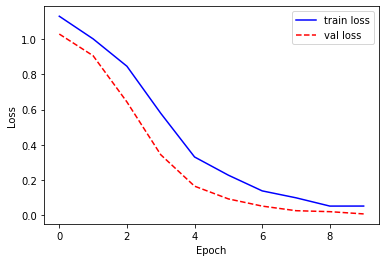

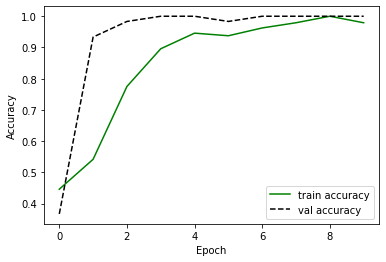

In [17]:
import matplotlib.pyplot as plt

# 손실값 그래프
plt.plot(history.history['loss'], 'b-', label='train loss')
plt.plot(history.history['val_loss'], 'r--', label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
plt.plot(history.history['accuracy'], 'g-', label='train accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()